# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



# <p style="text-align:center">Welcome to **<font face="Georgia">UCB Fintech Advisors, NPO</font>**</p>
## <p style="text-align:center"><font color="green">*<ins><font face="Georgia">The Best No Cost Local Community Financial Advisors Money Cannot Buy</font>*</ins></font></p>
#### <p style="text-align:center">WARNING !! Before proceeding, read our <font color="red"><ins>*[LEGAL DISCLAIMER](Images/legal_disclaimer.png)* </ins><--- CLICK HERE NOW !! WARNING 
                                                                                                                                   
# <p style="text-align:center">*<font face="Georgia">Prototype application - FinTech Financial Planner</font>*</p>                                                                                                                                  

<i class="fa-sharp fa-regular fa-building-columns"></i>

In [1]:
# Import the required libraries and dependencies

import os
import requests
import json
import pandas as pd
import alpaca_trade_api as tradeapi
import warnings # built-in Python module we use to call the `.filterwarnings` function to action

from dotenv import load_dotenv
from MCForecastTools import MCSimulation
from watermark import watermark # watermark module useful for documentation purposes and when sharing code

%matplotlib inline

In [2]:
# Python function ".filter warnings" sets the 'action' parameter to ignore all warning messages when running code

warnings.filterwarnings('ignore')

print(watermark())
print(watermark(iversions=True, globals_=globals(), packages=""))

Last updated: 2023-06-27T21:59:27.563744-07:00

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.31.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 154 Stepping 4, GenuineIntel
CPU cores   : 12
Architecture: 64bit

requests        : 2.28.1
alpaca_trade_api: 3.0.0
pandas          : 1.3.5
json            : 2.0.9



In [3]:
# Load the environment variables from the .env file
# by calling the load_dotenv function

load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

### <font color="green"><ins><font face="Helvetica">From Challenge # 5 Instructions, we are given:</font></ins>
    
1) The average monthly household income for each credit union member is $12,000.

2) Each credit union member has a savings portfolio that consists of a cryptocurrency wallet, stocks, and bonds

### <font color="green">average monthly household income for each credit union member is $12,000

In [5]:
# amended starter code variable 'monthly_income' to shortened alias for "Average Monthly Salary" as AMS

# The monthly amount for the member's household income

AMS = monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### <font color="green"><ins><font face="Georgia">This 'Prototype' Financial Planner by *UCB Fintech Consulting, NPO* uses an API by **"Free Crypto API"**</font></ins> for Crypto Quotes
To view the endpoint URLs for the API calls current and/or updating, try clicking below: 

+ [BITCOIN (BTC)](https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD)
+ [ETHEREUM (ETH)](https://api.alternative.me/v2/ticker/Ethereum/?convert=USD)

To confirm the data is current:

review the code and find following 2 lines in code from each of the above API links for BTC and ETH and confirm the '10-digit' codes are identical:

**`"last_updated": <## 10-digit code ###>`** 

**`"timestamp": <## 10-digit code ###>`**

Copy the '10-digit code' and check it with **[EpochConvertor](https://www.epochconverter.com/)** to 'Convert epoch to human-readable date and vice versa'

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(
    json.dumps(
        btc_response,
        indent=4, 
        sort_keys=True)
)


{
    "data": {
        "1": {
            "circulating_supply": 19413943,
            "id": 1,
            "last_updated": 1687928063,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 591350356816,
                    "percent_change_1h": -0.0233970224649638,
                    "percent_change_24h": 0.359202270973849,
                    "percent_change_7d": 6.08825640653724,
                    "percentage_change_1h": -0.0233970224649638,
                    "percentage_change_24h": 0.359202270973849,
                    "percentage_change_7d": 6.08825640653724,
                    "price": 30461.0,
                    "volume_24h": 15725235229
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19413943,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(
    eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(
    json.dumps(
        eth_response,
        indent=4, 
        sort_keys=True)
)


{
    "data": {
        "1027": {
            "circulating_supply": 120184000,
            "id": 1027,
            "last_updated": 1687928066,
            "max_supply": 120184000,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 224532333421,
                    "percent_change_1h": 0.0431708873566065,
                    "percent_change_24h": -0.212662228825016,
                    "percent_change_7d": 3.15445971099459,
                    "percentage_change_1h": 0.0431708873566065,
                    "percentage_change_24h": -0.212662228825016,
                    "percentage_change_7d": 3.15445971099459,
                    "price": 1867.96,
                    "volume_24h": 8263685488
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120184000,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_c

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC

print(f'Current price of BTC: ${btc_price:,.2f}')


Current price of BTC: $30,461.00


# <font color="green"><font face="Georgia">UCB Fintech Advisors, NPO</font>
### <font face="Georgia">Check out some other sources below: </font>

[Coinbase](https://www.coinbase.com/explore)

[Prices](https://prices.org/)

[Yahoo Finance](https://finance.yahoo.com/crypto/?guccounter=1&guce_referrer=aHR0cHM6Ly9kdWNrZHVja2dvLmNvbS8&guce_referrer_sig=AQAAAF1T2UVt4iTdGp_FHuOE2IwhZOwLEo7XTFFgWfSPcS1LRh_qF8iw8EcAEVjeDLFQ581W8_Pxt2O-LfpRjCU_Xhjd6cgFTirJIUImmMnQsFTeizfLQZzZrPbQk1GpnPHoZmNmyHXJgM9uiEg6KIj-Fkx_8S0-P7FKQgH1Ot1XzMvk)

In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH

print(f'Current price of ETH: ${eth_price:,.2f}')


Current price of ETH: $1,867.96


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 

btc_value = btc_coins * btc_price

# Print current value of your holding in BTC

print(f'The current value of your holding in BTC: ${btc_value:,.2f}')


The current value of your holding in BTC: $36,553.20


In [12]:
# Compute the current value of the ETH holding 

eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f'The current value of your holding in ETH: ${eth_value:,.2f}')


The current value of your holding in ETH: $9,900.19


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'Your current cryptocurrency wallet balance: ${total_crypto_wallet:,.2f}')

Your current cryptocurrency wallet balance: $46,453.39


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each

print(type(alpaca_api_key))
print(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v3")


<class 'str'>
<class 'str'>


In [16]:
# confirm tradeapi.REST object was created

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [17]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

# used alternative date suggestion: start/end on 2020-08-07

start_day = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
end_day = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [18]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

holdings_df = alpaca.get_bars(tickers, timeframe, start = start_day, end = end_day).df

# Reorganize the DataFrame
# Separate ticker data
SPY = holdings_df[holdings_df['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG = holdings_df[holdings_df['symbol'] == 'AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

holdings_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
print(holdings_df.head())

                              SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.28  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306  


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [19]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(holdings_df['AGG']['close'])

# Print the AGG closing price
print(f'AGG closed at ${agg_close_price:,.2f}')


AGG closed at $119.43


In [20]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price = float(holdings_df['SPY']['close'])

# Print the SPY closing price
print(f'SPY closed at ${spy_close_price:,.2f}')

SPY closed at $334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [21]:
# Calculate the current value of the bond portion of the portfolio

agg_value = agg_close_price * agg_shares


# Print the current value of the bond portfolio

print(f'The bond portfolio is currently valued at ${agg_value:,.2f}')


The bond portfolio is currently valued at $23,886.00


In [22]:
# Calculate the current value of the stock portion of the portfolio

spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio

print(f'The stock portfolio is currently valued at ${spy_value:,.2f}')


The stock portfolio is currently valued at $36,802.70


In [23]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The equity investment portfolio is currently valued at ${total_stocks_bonds :,.2f}')


The equity investment portfolio is currently valued at $60,688.70


In [24]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
TPV = total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f'The balance of your combined investments is ${total_portfolio:,.2f}; this includes all of your cryptocurrency, stocks, and bonds.')


The balance of your combined investments is $107,142.09; this includes all of your cryptocurrency, stocks, and bonds.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [25]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[46453.388, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [26]:
# Create a Pandas DataFrame called savings_df 
columns = ['amount']

index = ['Cryptocurrency Wallet', 'Stocks & Bonds']

savings_df = pd.DataFrame(data=savings_data, columns=columns, index=index)

# Display the savings_df DataFrame
savings_df

,amount
Cryptocurrency Wallet,46453.388
Stocks & Bonds,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

Text(0, 0.5, '')

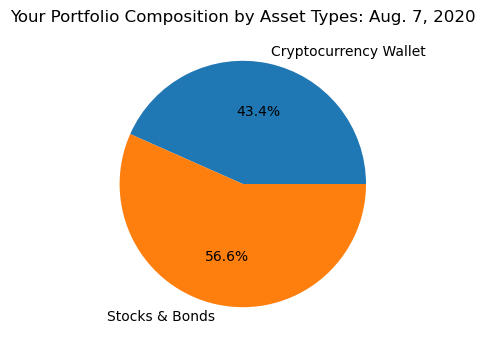

In [27]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

ax = savings_df.plot.pie(y='amount', figsize=(4, 4), autopct='%1.1f%%', legend=False,
                         title='Your Portfolio Composition by Asset Types: Aug. 7, 2020')

ax.set_ylabel('') # added because y-axis label looked distracting and unnecessary



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [28]:
# Create a variable named emergency_fund_value

EFV = emergency_fund_value = AMS * 3

print(f'We recommend all UCB Fintech Advisors Members maintain an `Emergency Fund` equal to 3x their monthly income; in your case, ${EFV:,.2f}')

We recommend all UCB Fintech Advisors Members maintain an `Emergency Fund` equal to 3x their monthly income; in your case, $36,000.00


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [29]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

# to test these conditions, toggle the # tags below to test values for each statement
# TPV = 12000
# TPV = 36000
# TPV = 48000

# if you decide to test the outputs here in prototype, don't forget to clear and reload original variables to maintain accurate values for variables! 

# note variable names previously equated to starter code for purposes of either shortened alias and better visual inline definition 

if TPV > EFV:
    surplus = TPV - EFV
    print(f'Boom! Savings surpassed our "Fiscal Health" benchmark. Congratulations, you now have a "mad money" reserve of ${surplus:,.2f}')
elif TPV == EFV:
    print(f'Phew! You just met the financial goal of ${EFV:,.2f} in savings. Congrats and keep up the good work!')
else:
    deficit = EFV - TPV
    print(f"You are just ${deficit:,.2f} away from our 'emergency reserves' savings requirement for financial stability")


Boom! Savings surpassed our "Fiscal Health" benchmark. Congratulations, you now have a "mad money" reserve of $71,142.09


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [30]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_call = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_call = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [33]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

pfl_3yr_df = alpaca.get_bars(tickers, timeframe, start=start_call, end=end_call).df

# Reorganize the DataFrame
# Separate ticker data

stocks_df = pfl_3yr_df[pfl_3yr_df['symbol']=='SPY'].drop('symbol', axis=1)
bonds_df = pfl_3yr_df[pfl_3yr_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

pfl_3yr_df = pd.concat([stocks_df, bonds_df], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame

pfl_3yr_df.head(), pfl_3yr_df.tail()

(                              SPY                                       \
                              open    high     low     close     volume   
 timestamp                                                                
 2017-08-07 04:00:00+00:00  247.49  247.87  247.37  247.8400   31995021   
 2017-08-08 04:00:00+00:00  247.51  248.91  246.83  247.2700   61719353   
 2017-08-09 04:00:00+00:00  246.47  247.31  246.06  247.2700   62632619   
 2017-08-10 04:00:00+00:00  246.29  246.44  243.70  243.7599  120418270   
 2017-08-11 04:00:00+00:00  244.02  244.80  243.75  244.1100   74869947   
 
                                                       AGG                    \
                           trade_count        vwap    open    high       low   
 timestamp                                                                     
 2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.72  109.6066   
 2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.69  109.5000  

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
traditional_6040 = mc_30yr(pfl_3yr_dfweights = [.60,.40], num_simulation = 500, num_trading_days = 252*30)

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = # YOUR CODE HERE
ci_upper_thirty_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?